In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


+ Which variables are numerical?
+ Which variables are categorical?
+ Which one is clearly the target variable?
+ Which variables seem redundant or not useful?

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


Almost 27% of customers are churning

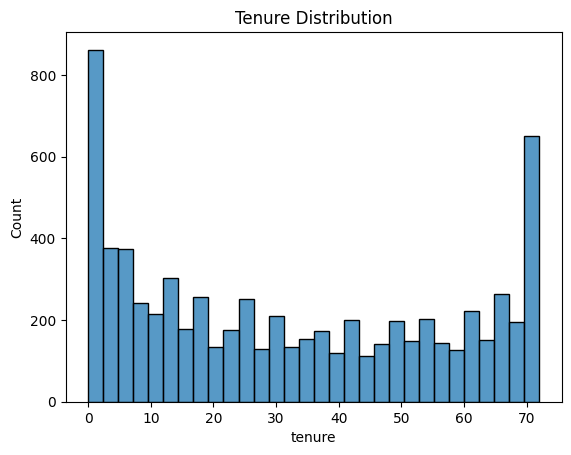

In [6]:
sns.histplot(df['tenure'], bins=30)
plt.title("Tenure Distribution")
plt.show()


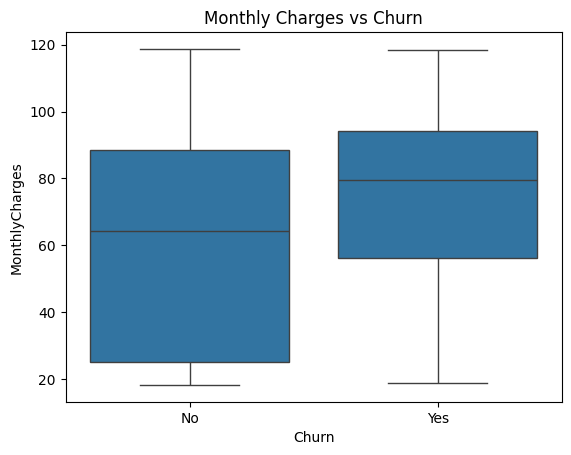

In [7]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


* Do new customers churn more?
* Does the price seem to influence churn?

In [8]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [9]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')


Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [10]:
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1, 'No':0})

df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.352229,0.193356,-0.199484,1.000000


# **Key Findings from EDA**

+ Customers with month-to-month contracts exhibit the highest churn rate compared to one-year and two-year contracts.

+ Churn is significantly higher among customers with low tenure, particularly during the first year.

+ Monthly charges tend to be higher for churned customers, suggesting price sensitivity.

# **Business Implications**
+ Contract type appears to be a major driver of churn, making contract structure a key lever for retention strategies.

+ High churn among new customers suggests potential issues in early customer experience or onboarding.

+ Customers paying higher monthly charges may not perceive sufficient value from the service.

# **Actionable Hypotheses**

+ Incentivizing long-term contracts could reduce churn among high-risk segments.

+ Enhancing onboarding and early engagement could lower churn in the first 12 months.

+ Offering bundled services may increase perceived value and reduce churn for price-sensitive customers.